
<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Note** - 

1. Simple linear Regression is useful when there is only one feature in X. 

2. In case of more than one feature in X, we should use multiple linear regression. 

3. yellowbrick - for data visualization

### Task 2: Load the Data

The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [3]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* sales is in 1000 of units.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isna()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [8]:
df.duplicated(subset=['TV', 'radio', 'newspaper']).values.any()

False

### Task 3: Relationship between Features and Response

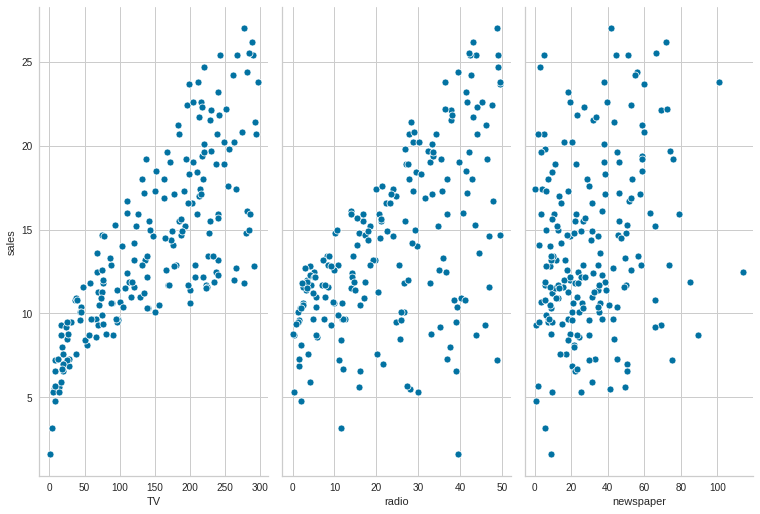

In [9]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', 
             height=7, aspect=0.5)

**Observation** - 

1. TV is most linearly correlated with sales. 

2. radio is less correlated with sales. 

3. newspaper is least correlated with sales.

### Task 4: Multiple Linear Regression - Estimating Coefficients

sales=β0+β1×TV+β2×radio+β3×newspaper+ϵ

Objective of mutiple LR - To find value of β0,β1,β2,ϵ.

In [10]:
#x=df[['TV', 'radio', 'newspaper']]
x=df.iloc[:,:-1] #ignoring the last sales column and taking every other
y=df.sales

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_)
print(lr.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [11]:
list(zip(['TV', 'radio', 'newspaper'], lr.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

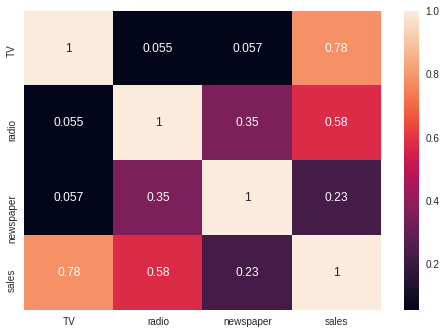

In [12]:
# annot=True - so we can see values within the matrix
sns.heatmap(df.corr(), annot=True)

**Observation** -

    corr(TV-sales) > corr(radio-sales) > corr(newspaper-sales)

### Task 5: Feature Selection

**Objective** - To determine that which predictors are required to get response in order to fit a single model. We will use r2 score algorithm.

In [13]:
lr2 = LinearRegression().fit(x[['TV']], y)
lr2_predictions = lr2.predict(x[['TV']])

print("R2 score for lr2:", r2_score(y,lr2_predictions))

R2 score for lr2: 0.611875050850071


In [14]:
lr2 = LinearRegression().fit(x[['TV',"radio"]], y)
lr2_predictions = lr2.predict(x[['TV', 'radio']])

print("R2 score for lr2:", r2_score(y,lr2_predictions))

R2 score for lr2: 0.8971942610828957


In [15]:
lr3 = LinearRegression().fit(x[['TV', 'radio','newspaper']], y)
lr3_predictions = lr3.predict(x[['TV', 'radio', 'newspaper']])

print("R2 score for lr3:", r2_score(y,lr3_predictions))

R2 score for lr3: 0.8972106381789522


**Observation** - The model that uses all three values have slightly less increase than the other hence we can say that newspaper have slightly low effect. Hence newspaper can be dropped as it does not provide no real improvement in the model fit to training samples and its inclusion will likely lead to poor result on independent test samples or test set due to over fitting.



### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>



<h5 align = center>$$y_i$$ is the actual value</h5>
<h5 align = center>$$\hat{y_i}$$ is the predicted value</h5>

**Note** - 

Lesser the value of RMSE (Root Mean Square Error), the better is the model.

Advantage of RMSE over MSE is that RMSE can be interpreted in y units i.e it can be interpreted as the standard deviation of unexplained variance.

The standard deviation is the square root of the variance.
The variance in probability theory and statistics is a way to measure how far a set of numbers is spread out. 

Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out.

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [16]:
x = df[['TV', 'radio', 'newspaper']]
y = df.sales

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1)

lr3 = LinearRegression().fit(X_train, Y_train)
lr3_predictions = lr3.predict(X_test)

print("when taking newspaper:")
print("RSME:", np.sqrt(mean_squared_error(Y_test,lr3_predictions)))
print("R2 score:", r2_score(Y_test,lr3_predictions))

when taking newspaper:
RSME: 1.404651423032895
R2 score: 0.9156213613792232


In [17]:
x = df[['TV', 'radio']]
y = df.sales

X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=1)

lr4 = LinearRegression().fit(X_train, Y_train)
lr4_predictions = lr4.predict(X_test)

print("With not newspaper:")
print("RMSE:", np.sqrt(mean_squared_error(Y_test, lr4_predictions)))
print("R2 score:", r2_score(Y_test, lr4_predictions))

With not newspaper:
RMSE: 1.3879034699382888
R2 score: 0.9176214942248907


**Observation** - 

RMSE(lr3) > RMSE(lr4)

but 

R2_score(lr3) < R2_score(lr4)

So, it is better to exclude newspaper.

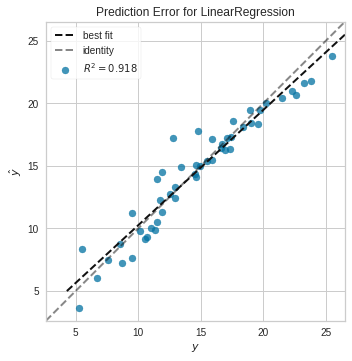

In [18]:
lr_final = lr4
visualizer = PredictionError(lr_final).fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof() #draw/show/poof the data

* identity line is drawn with the equation y=x

### Task 7: Interaction Effect (Synergy)

**Some important points** - 

1. **Interaction effect** means that two or more features/variables combined have a significantly larger effect on a feature as compared to the sum of the individual variables alone.

2. For eg - If you are marketing head(in case of this project), spending half of budget on radio and half budget on TV will be more beneficial as compared to spending full budget on only radio OR on only TV.

3. sales=β0+β1×TV+β2×radio+β3×newspaper+ϵ

    To allow for interaction effect, we have to include 3rd perdictor which is called as interaction term(which is constructed by computing the product of x1, x2, ...) - 

    intercation term = x1*x2*...

In [19]:
df['interation'] = df['TV'] * df['radio']

X=df[['TV', 'radio', 'interation']]
Y=df.sales

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

lr_finall = LinearRegression().fit(X_train, Y_train)
lr_finall_predictions = lr_finall.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(Y_test, lr_finall_predictions)))
print("R2 score:", r2_score(Y_test, lr_finall_predictions))

RMSE: 0.7011871137164328
R2 score: 0.978973681468126


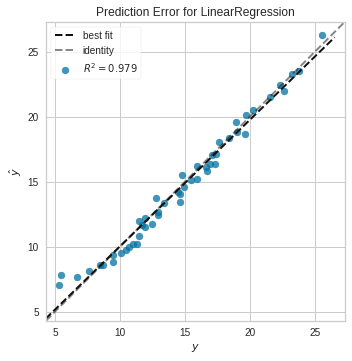

In [20]:
visualizer_finall = PredictionError(lr_finall).fit(X_train, Y_train)
visualizer_finall.score(X_test, Y_test)
visualizer_finall.poof()